---
Simple Linear Regression model was used with only the closing price as the independent variable
---
---

In [4]:
!pip install yfinance pandas numpy scikit-learn matplotlib
#installing the required libraries


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
# Fetch stock data for Wipro Ltd (NSE)
stock_symbol = "WIPRO.NS"
data = yf.download(stock_symbol, start="2021-01-01", end="2025-03-21")

[*********************100%***********************]  1 of 1 completed


In [7]:
data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
Date,,,,,
2021-01-01,184.853226,186.115426,183.400493,183.400493,10084672
2021-01-04,188.806549,189.544828,184.710339,185.758212,19511442
2021-01-05,193.521927,195.188988,187.425254,187.711038,50313494
2021-01-06,193.569580,198.808914,192.093038,192.902759,44972600
2021-01-07,193.736282,196.713177,192.355006,196.355949,24689510
2021-01-08,204.905594,206.072528,193.974432,194.093508,81986460
2021-01-11,212.812210,214.812689,207.191840,207.668143,94668036
2021-01-12,218.003937,219.456655,210.716491,213.359981,44268930


In [8]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
Date,,,,,
2025-03-13,264.000000,271.100006,263.350006,268.549988,8683943
2025-03-17,259.850006,265.200012,258.899994,264.000000,12697926
2025-03-18,259.850006,259.850006,259.850006,259.850006,0
2025-03-19,265.700012,266.500000,256.250000,262.000000,14044300
2025-03-20,268.000000,273.950012,267.500000,269.200012,17038774


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2021-01-01 to 2025-03-20
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, WIPRO.NS)   1043 non-null   float64
 1   (High, WIPRO.NS)    1043 non-null   float64
 2   (Low, WIPRO.NS)     1043 non-null   float64
 3   (Open, WIPRO.NS)    1043 non-null   float64
 4   (Volume, WIPRO.NS)  1043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 48.9 KB


In [10]:
data['Days'] = np.arange(len(data))
X = data[['Days']].values  # Independent variable (Days)
y = data['Close'].values  # Dependent variable (Stock Price)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (834, 1), Testing Data: (209, 1)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
print(f"Model Coefficients: {model.coef_}")  # Slope (a)
print(f"Model Intercept: {model.intercept_}")  # y-intercept (b)
#Y=aX+b

Model Coefficients: [[-0.00119499]]
Model Intercept: [238.97678254]


In [12]:
# Predict stock prices
predicted_prices = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, predicted_prices)
mse = mean_squared_error(y_test, predicted_prices)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 37.26
Mean Squared Error: 1843.98
Root Mean Squared Error: 42.94


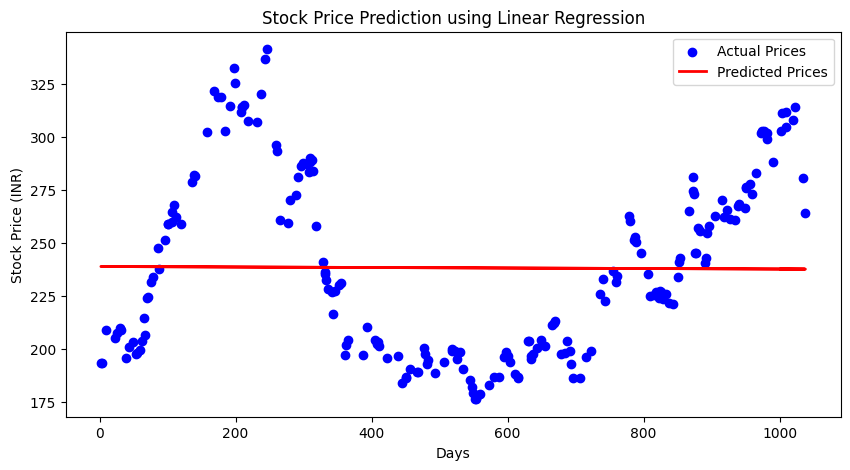

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.plot(X_test, predicted_prices, color='red', linewidth=2, label="Predicted Prices")
plt.title("Stock Price Prediction using Linear Regression")
plt.xlabel("Days")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.show()


---
The Graph shows the best fit line is underfit - Simple Linear Regression using polynomial features to fit the line close to the actual points
---

---


Mean Absolute Error (MAE): 29.75 INR
Mean Squared Error (MSE): 1491.56
Root Mean Squared Error (RMSE): 38.62 INR


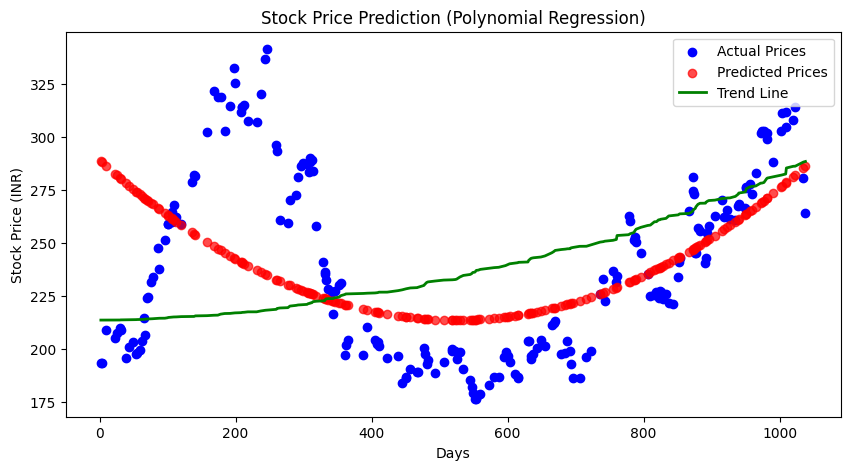

In [14]:
# Apply Polynomial Transformation (Degree 2 for better trend capture)
poly = PolynomialFeatures(degree=2)  # You can change degree for better accuracy
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on Test Data
y_pred = model.predict(X_test_poly)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} INR")

# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.scatter(X_test, y_pred, color='red', label="Predicted Prices", alpha=0.7)
plt.plot(sorted(X_test), sorted(y_pred), color="green", linewidth=2, label="Trend Line")
plt.title("Stock Price Prediction (Polynomial Regression)")
plt.xlabel("Days")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.show()


Mean Absolute Error (MAE): 23.63 INR
Mean Squared Error (MSE): 868.29
Root Mean Squared Error (RMSE): 29.47 INR


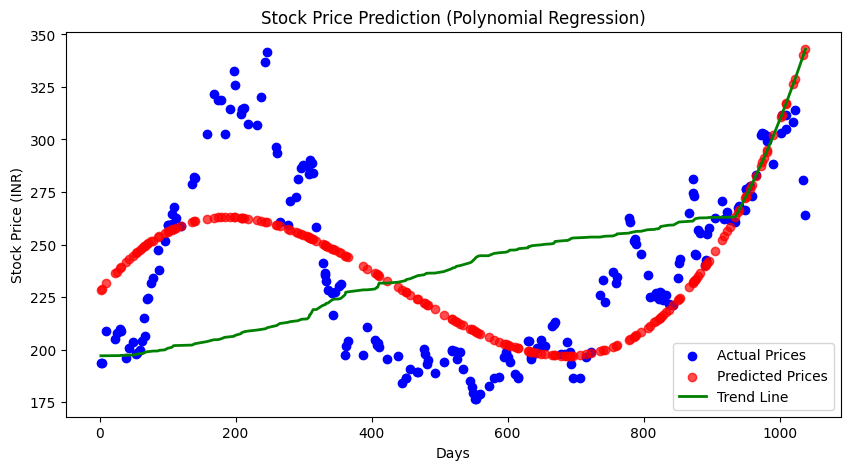

In [15]:
#CHANGE DEGREE TO FIT THE CURVE

poly = PolynomialFeatures(degree=3)  # You can change degree for better accuracy
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on Test Data
y_pred = model.predict(X_test_poly)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} INR")

# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.scatter(X_test, y_pred, color='red', label="Predicted Prices", alpha=0.7)
plt.plot(sorted(X_test), sorted(y_pred), color="green", linewidth=2, label="Trend Line")
plt.title("Stock Price Prediction (Polynomial Regression)")
plt.xlabel("Days")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.show()


Mean Absolute Error (MAE): 16.73 INR
Mean Squared Error (MSE): 382.72
Root Mean Squared Error (RMSE): 19.56 INR


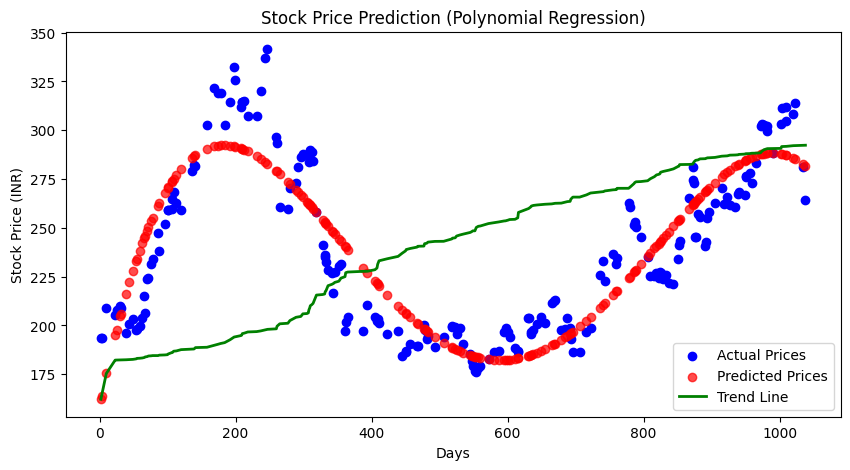

In [16]:
#CHANGE DEGREE TO FIT THE CURVE

poly = PolynomialFeatures(degree=4)  # You can change degree for better accuracy
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on Test Data
y_pred = model.predict(X_test_poly)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} INR")

# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.scatter(X_test, y_pred, color='red', label="Predicted Prices", alpha=0.7)
plt.plot(sorted(X_test), sorted(y_pred), color="green", linewidth=2, label="Trend Line")
plt.title("Stock Price Prediction (Polynomial Regression)")
plt.xlabel("Days")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.show()



To reduce MSE we use Polynomial Regression with Multiple Features, considering some more independent variables and regulating overfitting
---

**Here’s a simpler, cleaner version of the error metrics explanation:

1. **Mean Absolute Error (MAE)**  
   - What it is: Average amount your predictions are off.  
   - How it’s calculated: Add up all the differences between actual and predicted values, then divide by the number of predictions.  
   - Example: MAE = 5 means you’re off by ₹5 on average.  

2. **Mean Squared Error (MSE)**  
   - What it is: Average of squared differences, so big mistakes stand out more.  
   - How it’s calculated: Square each mistake, add them up, then divide by the number of predictions.  
   - Why it matters: Higher MSE means bigger errors.  

3. **Root Mean Squared Error (RMSE)**  
   - What it is: Square root of MSE, keeps it in the same units (like ₹).  
   - How it’s calculated: Square the mistakes, average them, then take the square root.  
   - Example: RMSE = 7 means you’re off by about ₹7 on average.  

**Quick Takeaway:**  
- MAE: Simple average error.  
- MSE: Focuses on big mistakes.  
- RMSE: Like MSE, but easier to relate to (e.g., ₹).**

---
STOCK PRICE PREDICTION USING POLYNOMIAL FEATURES IN MULTIPLE LINEAR REGRESSION MODEL
---
---

Enter the stock symbol (e.g., WIPRO.NS): ITC.NS
Enter the start date (YYYY-MM-DD): 2025-03-01
Enter the end date (YYYY-MM-DD): 2025-03-25


[*********************100%***********************]  1 of 1 completed


Fetching data for ITC.NS from 2025-03-01 to 2025-03-25... Please wait.

Model Performance:
Mean Absolute Error (₹): 8.98
Mean Squared Error (₹): 108.36
Root Mean Squared Error (₹): 10.41


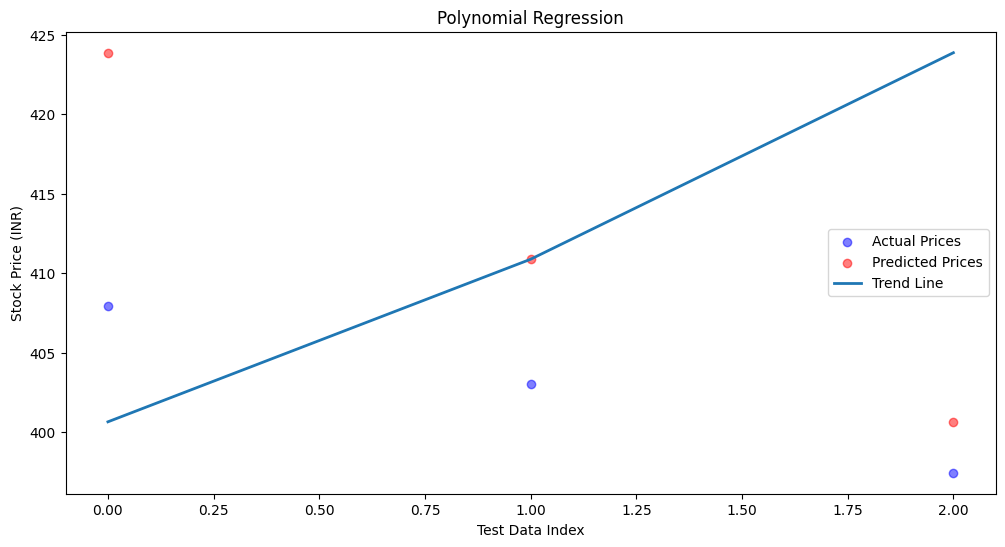


 Predicted Prices for ITC.NS for the Next 3 Days:
2025-03-25 → Predicted Price: ₹410.02
2025-03-26 → Predicted Price: ₹409.05
2025-03-27 → Predicted Price: ₹407.98


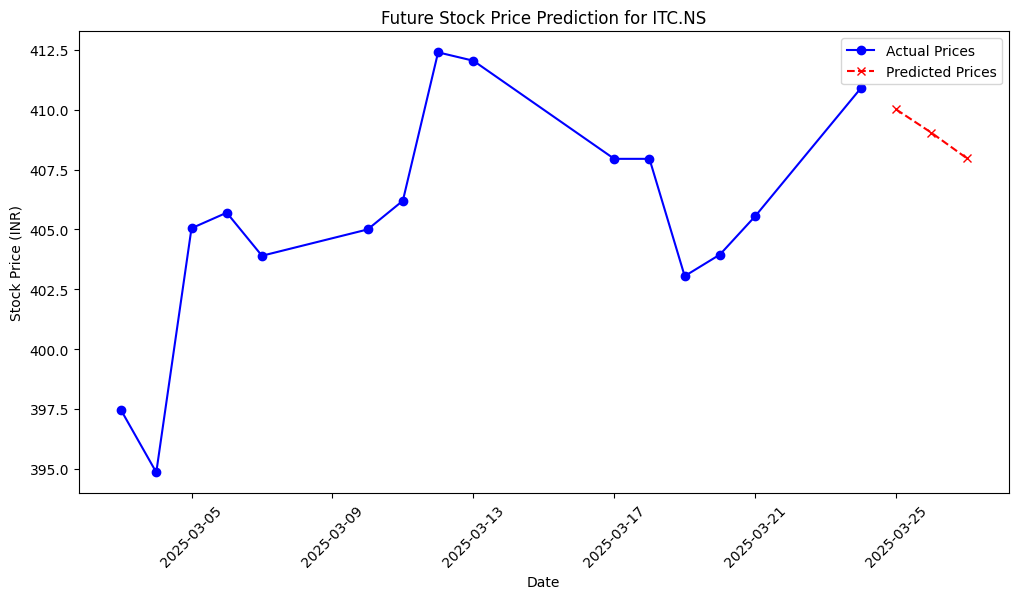

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import timedelta

#  User Inputs
stock_symbol = input("Enter the stock symbol (e.g., WIPRO.NS): ").strip()
start_date = input("Enter the start date (YYYY-MM-DD): ").strip()
end_date = input("Enter the end date (YYYY-MM-DD): ").strip()

#  Fetch stock data from Yahoo Finance
print(f"\nFetching data for {stock_symbol} from {start_date} to {end_date}... Please wait.")
data = yf.download(stock_symbol, start=start_date, end=end_date)


if data.empty:
    print("\n⚠️ No data found! Please check the stock symbol and date range.")
    exit()


data['Days'] = np.arange(len(data))
X = data[['Open', 'High', 'Low', 'Volume', 'Days']].values
y = data['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression Model
degree = 2  # CAN CHANGE DEGREE VALUE IF THE MODEL IS UNDERFIT OR OVERFIT
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)


y_pred = model.predict(X_test_poly)

# Evaluate Model Accuracy
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance:")
print("Mean Absolute Error (₹):", round(mae, 2))
print("Mean Squared Error (₹):", round(mse, 2))
print("Root Mean Squared Error (₹):", round(rmse, 2))

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label="Actual Prices", alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label="Predicted Prices", alpha=0.5)
plt.plot(sorted(range(len(y_test))), sorted(y_pred), linewidth=2, label="Trend Line")
plt.xlabel("Test Data Index")
plt.ylabel("Stock Price (INR)")
plt.title("Polynomial Regression")
plt.legend()
plt.show()


num_future_days = 3  # CAN CHANGE PREDICTION DAYS

last_day = data['Days'].iloc[-1]
last_date = data.index[-1]

future_days = np.array([last_day + i for i in range(1, num_future_days + 1)])

latest_features = data.iloc[-1][['Open', 'High', 'Low', 'Volume']].values
future_features = np.column_stack([np.tile(latest_features, (num_future_days, 1)), future_days])

future_poly = poly.transform(future_features)
future_prices = model.predict(future_poly)

# Print Future Predictions with Actual Dates
print(f"\n Predicted Prices for {stock_symbol} for the Next {num_future_days} Days:")
future_dates = []
for i, price in enumerate(future_prices, 1):
    future_date = last_date + timedelta(days=i)  # Calculate future date dynamically
    future_dates.append(future_date)
    print(f"{future_date.date()} → Predicted Price: ₹{float(np.squeeze(price)):.2f}")

#  Plot Future Predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Actual Prices", color='blue', marker='o', linestyle="-")
plt.plot(future_dates, future_prices, label="Predicted Prices", color='red', marker='x', linestyle="--")
plt.xlabel("Date")
plt.ylabel("Stock Price (INR)")
plt.title(f"Future Stock Price Prediction for {stock_symbol}")
plt.legend()
plt.xticks(rotation=45)
plt.show()
